<font size="6">最尤推定法の演習</font>

【Pythonで統計入門】最尤推定/MAP推定を使って曲線フィッティングをやってみた
Source: https://qiita.com/yryrgogo/items/e2774a5a891700c3916a

<font size="5">データの準備</font>

    Score      Y
0   0.255  0.133
1   0.345  0.286
2   0.410  0.264
3   0.440  0.293
4   0.445  0.260
5   0.495  0.268
6   0.525  0.302
7   0.545  0.371
8   0.550  0.207
9   0.555  0.287
10  0.555  0.330
11  0.565  0.253
12  0.570  0.345
13  0.595  0.337
14  0.595  0.307
15  0.610  0.289
16  0.625  0.261
17  0.630  0.391
18  0.645  0.360
19  0.655  0.311
20  0.665  0.356
21  0.665  0.350
22  0.685  0.423
23  0.725  0.360
24  0.730  0.413
25  0.740  0.328
26  0.750  0.353
27  0.805  0.383
28  0.910  0.383
29  0.925  0.413


C:\Users\hirok\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Text(0,0.5,'Y')

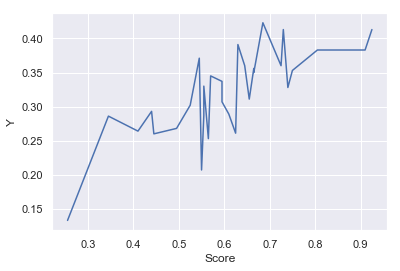

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('lec2_5_data.txt') # データセットを読み込む
data.Score /= 200 # スケーリングして絶対値を揃える

#ソート＆見やすいデータに絞る（大人の事情）
data = data.sort_values(by='Score')[data.A != 1]
data = data.reset_index().drop('index', axis=1)[['Score', 'Y']]

print(data)

sns.set_style("whitegrid")
sns.set(font_scale=1)
plt.plot(data['Score'], data['Y'])
plt.xlabel('Score')
plt.ylabel('Y')


<font size="5">最尤推定</font>

In [30]:
D = 3 # n次多項式の次数, 10にしてみると

In [31]:
# 最尤推定

import numpy as np

# 観測データから多項式の係数を推定
def estimate(x, y):

    # 対数尤度の式を各係数で編微分し、その結果得られる方程式の係数行列を作成
    # 係数行列を対称行列へ変形する仮定と同じ（数学知ってる人は偏微分せずこれでもいける）
    Sym = []
    for i in range(D+1):
        for j in range(D+1):
            Sym.append((x**(i+j)).sum())

    Sym = np.array(Sym).reshape(D+1, D+1)

    # 右辺の列ベクトルを作成
    R = []
    N = len(y)
    for i in range(D+1):
        tmp = 0
        for j in range(N):
            tmp += y[j] * x[j]**i
        R.append(tmp)

    R = np.array(R).T # 行ベクトルから列ベクトルに直さなくても計算はできる

    # R = Sym * 変数ベクトル⇒これを求める
    W = np.linalg.solve(Sym, R)

    return W

In [32]:
x = np.array(data['Score'])
y = np.array(data['Y'])
n = len(x)

# 多項式の係数を推定
w = estimate(x, y)
print(w)

[-0.04618021  1.06945387 -0.98455162  0.386171  ]


In [33]:
def Y(x, W):

    N = len(x)
    P = []

    # 多項式を計算してるだけ
    for i in range(N):
        tmp = 0
        for j in range(D+1):
            tmp += (x[i]**(j)) * W[j]
        P.append(tmp)

    return np.array(P)


# 推定した係数から予測値を求める
p = Y(x, w)

# 予測値の標準偏差を求める
beta = np.sqrt(((p-y)**2).sum() / n)
print(beta)

# 95%信頼区間
up  = p + 1.96*beta
low = p - 1.96*beta

0.04028050388326396


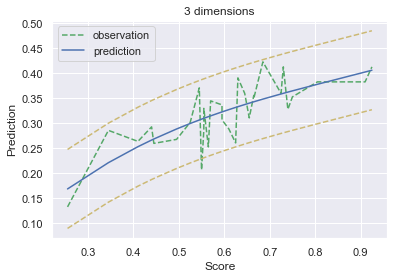

In [36]:
# 描画
sns.set_style("whitegrid")
sns.set(font_scale=1)

plt.title('{} dimensions'.format(D))
plt.plot(x, y, 'g--', label='observation') # 観測データ
plt.plot(x, p, 'b-' , label='prediction')  # 予測データ
plt.plot(x, up, 'y--')
plt.plot(x, low, 'y--')
plt.legend() # ラベルを表示
plt.xlabel('Score')
plt.ylabel('Prediction')
plt.show()

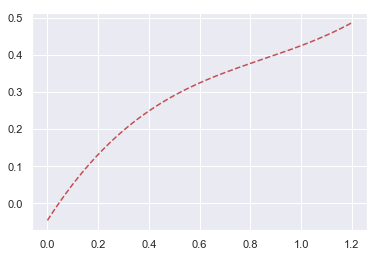

In [37]:
# 観測外のデータに対しては…
xp = np.linspace(0.0,1.2,200)
yp = Y(xp, w)

plt.plot(xp, yp, 'r--', label='pred+')     # 外挿チェック